## Model Diagnostics

## Estimation Methods

cs611 Classwork 4.20.21

In [5]:
library(TSA)
data(oil.price)

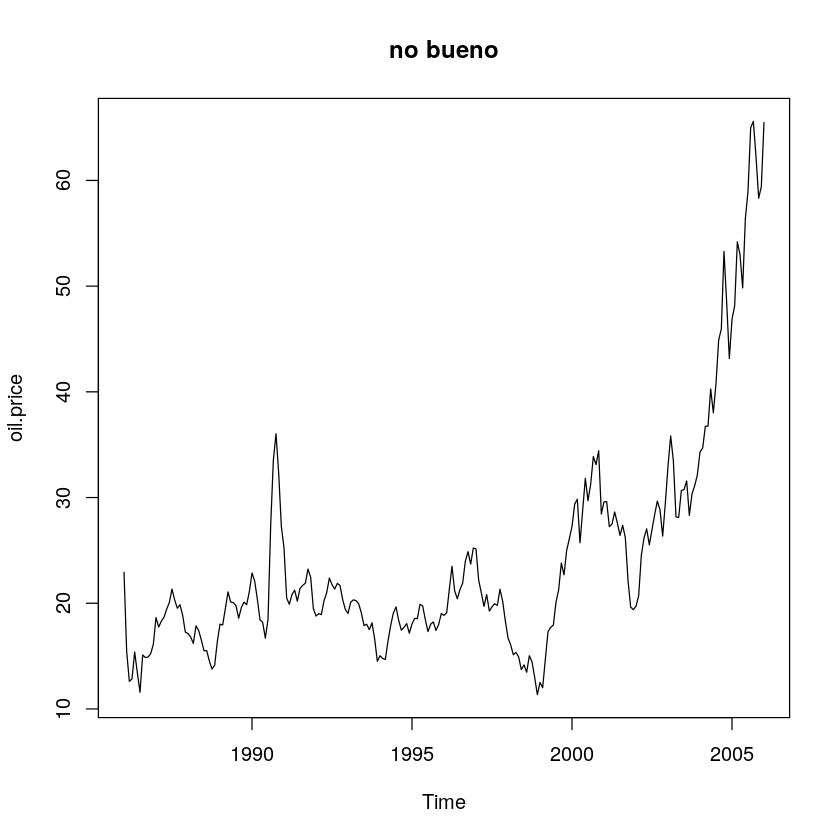

In [8]:
plot(oil.price, main="no bueno")

Is dis stationary? No

The variance and mean increase with time

It makes sense to take the log as a variance stabilitizing transformation and then difference

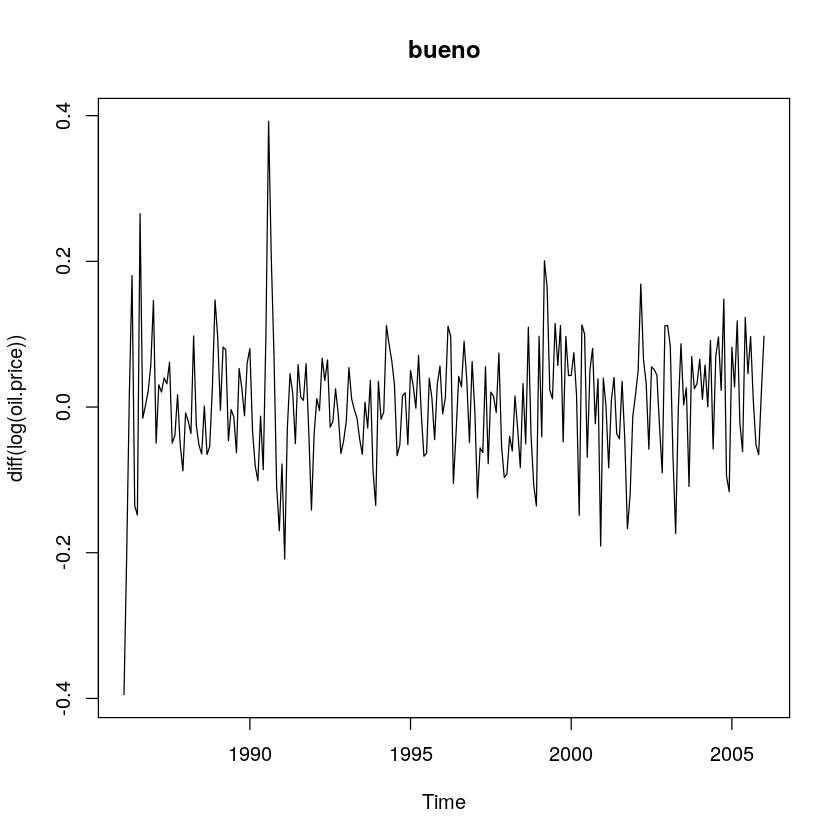

In [10]:
plot(diff(log(oil.price)), main="bueno")

If you had to guess what do u think that is 

why are we guessing we can get acf and see whats going on 

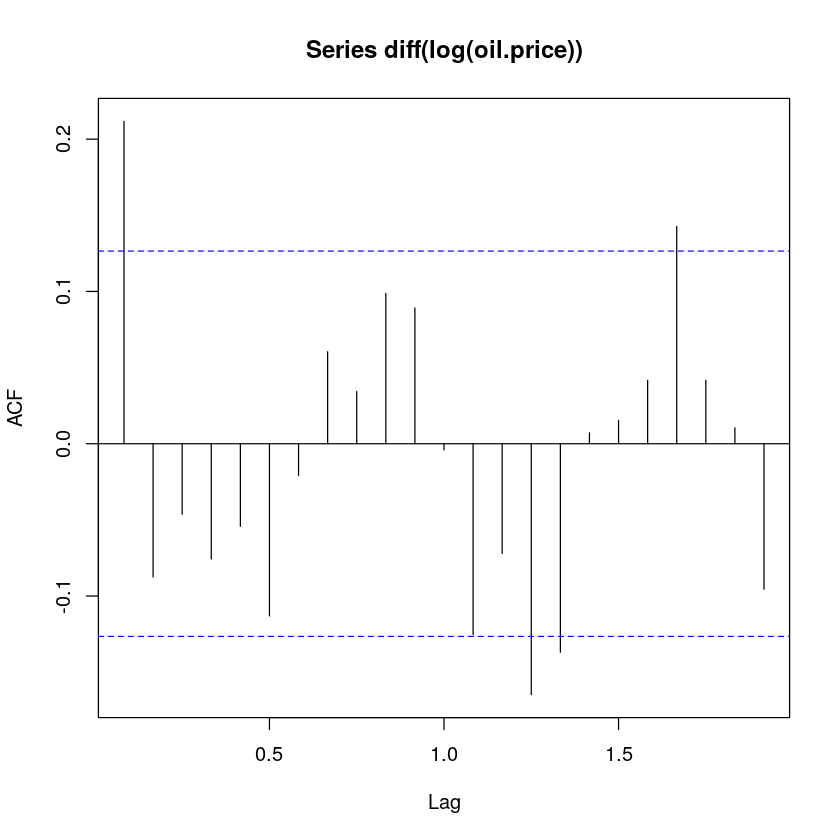

In [12]:
acf(diff(log(oil.price)))

Based on ACF what do you think it is 

MA(1) 

Lets estimate the difference of the log and see what order it is 

In [14]:
arima(diff(log(oil.price)), order=c(0,0,1), method="ML")


Call:
arima(x = diff(log(oil.price)), order = c(0, 0, 1), method = "ML")

Coefficients:
         ma1  intercept
      0.2939     0.0041
s.e.  0.0696     0.0068

sigma^2 estimated as 0.006679:  log likelihood = 260.47,  aic = -516.94

In [16]:
model1 = arima(diff(log(oil.price)), order=c(0,0,1), method="CSS")

you can see estimator for MA THETA changed from .09 to .07 which is about a 10% change which is large 

Lets see GOF

if the model was good, the residuals would be 
1/20 sample acf should stick out outside of the band around 0 if its white noise

do we see that or is it suspicious behavior 

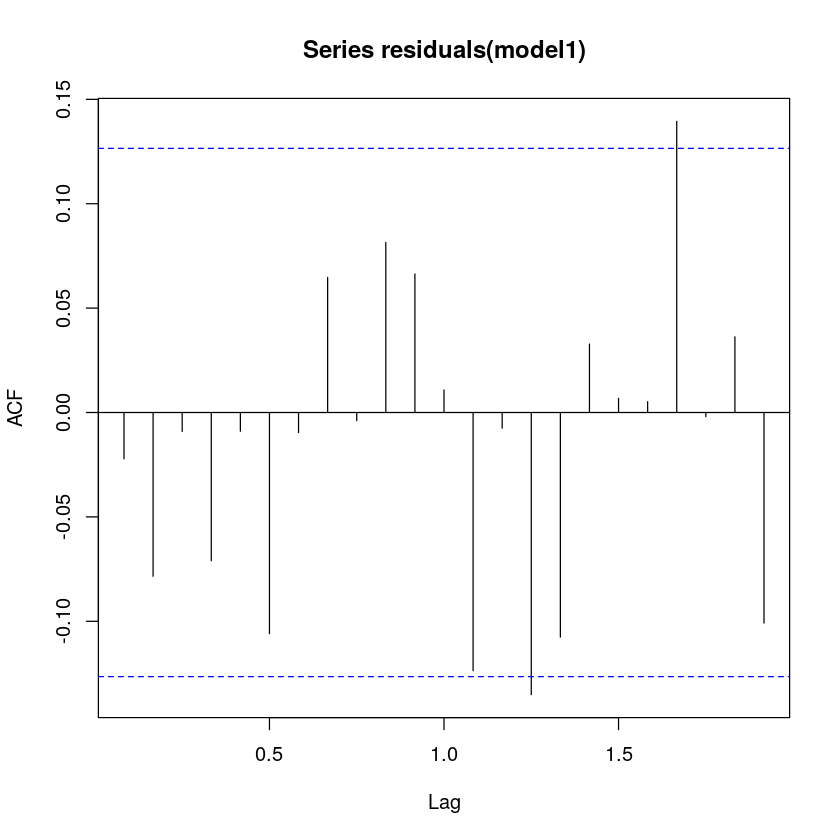

In [17]:
acf(residuals(model1))

In [18]:
Box.test(residuals(model1))


	Box-Pierce test

data:  residuals(model1)
X-squared = 0.1181, df = 1, p-value = 0.7311


small p value rejects null hyp that true acf values are 0 

so we cannot reject it seems like the model fits the data well from BP 

the pvalue is large so we fail to reject 